# ESPECTROSCOPIO: Visualización del espectro y Calibración.
Laboratorio Avanzado II / Docente: Edgar Rueda

Presentado por Alexander Valencia.

Jueves 2 de diciembre de 2020.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
#from google.colab import drive
from PIL import Image
%matplotlib inline

In [ ]:
!gdown --id 1nLJxVLLyja6IE-rVgGb-hEnRx-jjJFaf
!gdown --id 1J6F4ZJd1VvBHWwzobZ75gvCwHNldvjn8

Downloading...
From: https://drive.google.com/uc?id=1nLJxVLLyja6IE-rVgGb-hEnRx-jjJFaf
To: /content/Arco.jpg
100% 75.2k/75.2k [00:00<00:00, 28.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1J6F4ZJd1VvBHWwzobZ75gvCwHNldvjn8
To: /content/Referencia.png
100% 73.8k/73.8k [00:00<00:00, 27.1MB/s]


Text(0.5, 1.0, 'Gris')

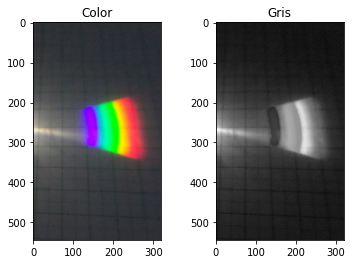

In [ ]:
# Conversión de la imagen a escala de grises
I = Image.open("Arco.jpg")
plt.subplot(1,2,1)
plt.imshow(np.asarray(I))
plt.title('Color')

I1 = I.convert('L')
c = np.asarray(I1, dtype=np.float32)
plt.subplot(1,2,2)
plt.imshow(c, cmap='gray')
plt.title('Gris')
#plt.axis('Off')

In [ ]:
datos = np.matrix(I1.getdata())
print(c)

[[48. 51. 49. ... 44. 45. 47.]
 [48. 51. 49. ... 45. 46. 52.]
 [50. 53. 51. ... 49. 46. 50.]
 ...
 [50. 45. 42. ... 48. 44. 45.]
 [57. 51. 46. ... 47. 45. 46.]
 [55. 50. 47. ... 42. 43. 44.]]


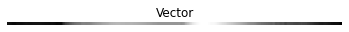

[[ 80.  77.  74.  74.  77.  77.  77.  79.  80.  79.  79.  80.  80.  80.
   80.  79.  78.  78.  77.  78.  77.  74.  75.  74.  93. 105. 111. 119.
  125. 130. 133. 134. 139. 140. 139. 140. 143. 147. 150. 152. 154. 158.
  159. 161. 164. 166. 167. 168. 168. 167. 167. 166. 166. 166. 165. 164.
  163. 162. 161. 160. 158. 157. 155. 153. 152. 150. 150. 150. 150. 150.
  150. 150. 150. 150. 151. 149. 151. 166. 175. 185. 194. 199. 203. 206.
  207. 207. 207. 205. 203. 203. 201. 197. 193. 189. 187. 182. 179. 176.
  172. 168. 165. 161. 157. 153. 148. 145. 144. 141. 136. 133. 130. 128.
  126. 124. 122. 125. 116. 118. 113. 115. 107. 112. 111. 110. 108. 107.
  108. 110. 108. 107. 103.  99.  96.  92.  90.  86.  85.  87.  85.  83.
   78.  77.  77.  76.  69.]]


In [ ]:
vector = c[260:261, 135:280]
plt.imshow(vector, cmap='gray')
plt.title('Vector')
plt.axis('off')
plt.show()

print(vector)

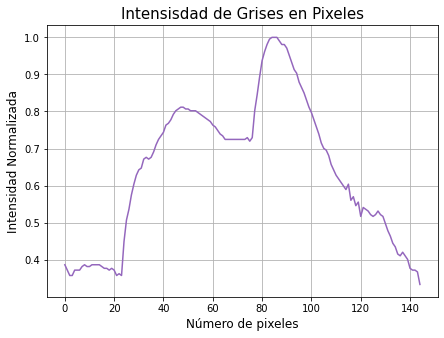

In [ ]:
# Grafica para la fracción de pixeles en escala de grises seleccionados
x = np.arange(145.)
y = np.ravel(vector)

plt.figure(figsize=(7,5))
plt.title('Intensisdad de Grises en Pixeles', fontsize = 15)
plt.plot(x, y/207., 'tab:purple')
plt.xlabel('Número de pixeles', fontsize = 12)
plt.ylabel('Intensidad Normalizada', fontsize = 12)
plt.grid()
plt.show()

In [ ]:
# Coordenadas de puntos maximos locales
x_min = 70
x_max = 100

rango_x = x[(x > x_min) & (x < x_max)]
rango_y = list(y[(x > x_min) & (x < x_max)])
xmax = rango_x[rango_y.index(max(rango_y))]

print("El maximo local esta en", xmax)
print("Su intensidad es",max(rango_y))

El maximo local esta en 84.0
Su intensidad es 207.0


Text(0.5, 1.0, 'Color')

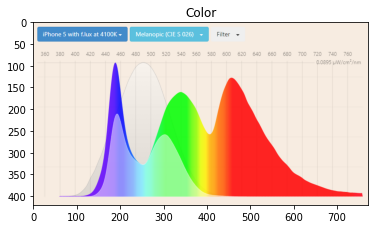

In [ ]:
I3 = Image.open("Referencia.png")
plt.imshow(np.asarray(I3))
plt.title('Color')

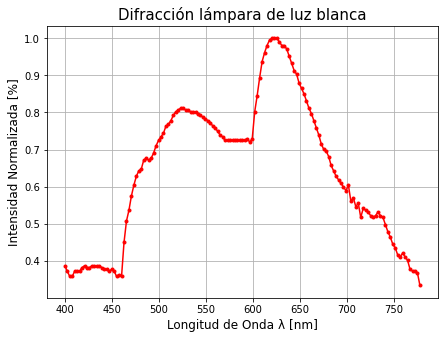

In [ ]:
# El factor de conversion es 380/145, tomando el rango de [380, 760] nm, en la referencia
l = x*2.6207 + 400
y = np.ravel(vector)

plt.figure(figsize=(7,5))
plt.title('Difracción lámpara de luz blanca', fontsize = 15)
plt.plot(l, y/207., '.-', color='red')
plt.xlabel('Longitud de Onda λ [nm]', fontsize = 12)
plt.ylabel('Intensidad Normalizada [%]', fontsize = 12)
plt.grid()
plt.show()